In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

Using TensorFlow backend.


In [2]:
df=pd.read_csv("data/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_test=pd.read_csv("data/test.csv").values
df_test[0:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [4]:
X=df.drop(["label"],axis="columns").values
Y=df["label"].values
X=X/255.0

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [6]:
X=X.reshape(len(X),28,28,-1)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

# Data Augumentation

In [7]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1,  
        width_shift_range=0.1,  
        height_shift_range=0.1, 
        horizontal_flip=False,  
        vertical_flip=False) 

datagen.fit(x_train)

In [8]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [9]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16,(3,3),padding='same',activation='relu',input_shape=(28,28,1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(10, activation="softmax")
    ])

optimizer=tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
model.summary()    

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0

In [10]:
batch_size = 64
epochs = 20
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_test, y_test), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
525/525 - 52s - loss: 0.3419 - accuracy: 0.8931 - val_loss: 0.2022 - val_accuracy: 0.9351 - lr: 0.0010
Epoch 2/20
525/525 - 52s - loss: 0.1375 - accuracy: 0.9560 - val_loss: 0.0712 - val_accuracy: 0.9781 - lr: 9.0000e-04
Epoch 3/20
525/525 - 55s - loss: 0.0985 - accuracy: 0.9691 - val_loss: 0.0580 - val_accuracy: 0.9824 - lr: 8.1000e-04
Epoch 4/20
525/525 - 53s - loss: 0.0836 - accuracy: 0.9727 - val_loss: 0.0450 - val_accuracy: 0.9882 - lr: 7.2900e-04
Epoch 5/20
525/525 - 54s - loss: 0.0710 - accuracy: 0.9778 - val_loss: 0.0697 - val_accuracy: 0.9795 - lr: 6.5610e-04
Epoch 6/20
525/525 - 49s - loss: 0.0630 - accuracy: 0.9796 - val_loss: 0.0351 - val_accuracy: 0.9890 - lr: 5.9049e-04
Epoch 7/20
525/525 - 49s - loss: 0.0626 - accuracy: 0.9805 - val_loss: 0.0282 - val_accuracy: 0.9910 - lr: 5.3144e-04
Epoch 8/20
525/525 - 49s - loss: 0.0576 - accuracy: 0.9812 - val_loss: 0.0370 - val_accuracy: 0.9877 -

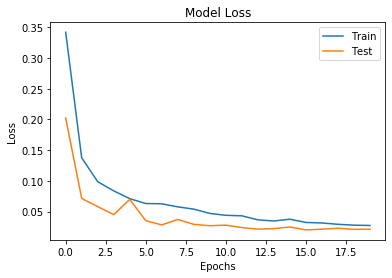

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

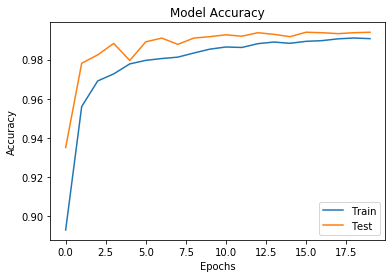

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])
plt.show()

In [13]:
model.evaluate(x_test,y_test)

263/263 [==============================] - 2s 8ms/step - loss: 0.0212 - accuracy: 0.9939


[0.021211134269833565, 0.9939285516738892]

In [14]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
y_preds=[np.argmax(pred) for pred in y_pred]
accuracy_score(y_preds,y_test)

0.9939285714285714

In [15]:
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(y_test,y_preds) 
confusion_mtx

array([[859,   0,   0,   0,   0,   0,   4,   0,   1,   0],
       [  0, 948,   2,   0,   0,   0,   0,   4,   0,   1],
       [  0,   0, 768,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   1, 847,   0,   3,   0,   1,   0,   1],
       [  0,   0,   0,   0, 840,   0,   1,   0,   0,   1],
       [  0,   0,   0,   0,   0, 788,   1,   0,   1,   0],
       [  1,   1,   1,   0,   0,   0, 790,   0,   1,   0],
       [  0,   0,   2,   0,   2,   0,   0, 869,   0,   2],
       [  0,   1,   3,   0,   1,   0,   1,   0, 813,   3],
       [  3,   0,   0,   0,   3,   0,   0,   3,   0, 827]], dtype=int64)

In [17]:
model.save('model.h5')

In [18]:
df_test=df_test.reshape(len(df_test),28,28,-1)
a_pred=model.predict((df_test)/255.0)
a_preds=[np.argmax(pred) for pred in a_pred]
    
samp=pd.read_csv("data/sample_submission.csv")
samp["Label"]=a_preds
samp.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [19]:
samp.to_csv("outputCNN.csv",index=False)